## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [106]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import string
from sklearn.metrics import accuracy_score
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
import pandas as pd
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
warnings.filterwarnings('ignore')               # Turn the warnings off.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rania\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [107]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [108]:
len(my_docs)

1017

In [109]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000,   17], dtype=int64))

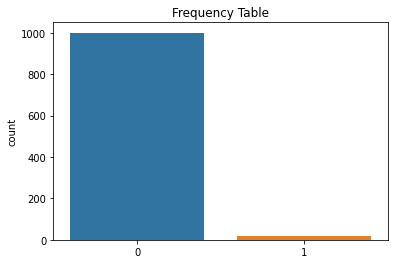

In [110]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Carry out the data pre-processing:

In [111]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation, remove words containing numbers, remove stop words and Xs.'''
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text





In [112]:
my_docs = list(map(lambda x: clean_text(x), list(my_docs)))


2). Create a TF IDF representation.

In [113]:
vect = TfidfVectorizer(decode_error='ignore', stop_words='english')
X = vect.fit_transform(my_docs).toarray()

3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)


In [116]:
# Training.
NB = GaussianNB()
#your code goes here
NB.fit(X_train,Y_train)

GaussianNB()

Accuracy=0.98


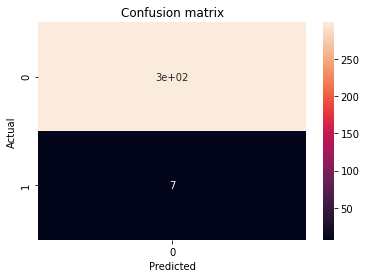

In [120]:
# Testing.
Y_pred = NB.predict(X_test)

 #use confusion matrix 

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')

#use accuracy_score
print("Accuracy={:.2f}".format(accuracy_score(Y_test, Y_pred)))
